# Data Analysis on Ethereum Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
sc

In [4]:
from pyspark.sql import HiveContext

In [5]:
hive_context = HiveContext(sc)

In [57]:
eth_data = hive_context.table("cryptocurrency.ether_data_mod")

In [58]:
eth_data.show()

+----------+------+-----------+--------------+-------------+-----------+--------------------+--------------+-------------------+--------------+----------+-------------+-------------+-------------+
|      date|eth_tx|eth_address|eth_etherprice|eth_marketcap| eth_supply|eth_network_hashrate|eth_difficulty|eth_transaction_fee|eth_blockcount|eth_uncles|eth_blocksize| eth_gasprice|eth_blocktime|
+----------+------+-----------+--------------+-------------+-----------+--------------------+--------------+-------------------+--------------+----------+-------------+-------------+-------------+
|2015-07-30|8893.0|     9205.0|           0.0|          0.0|7.2049304E7|             11.5297|         0.121|                0.0|        6912.0|    1299.0|        644.0|          0.0|         4.46|
|2015-07-31|   0.0|     9361.0|           0.0|          0.0|7.2085496E7|             51.4594|         0.603|                0.0|        6863.0|     511.0|        582.0|          0.0|        12.58|
|2015-08-01|   

In [59]:
#Checking for nulls

from pyspark.sql.functions import col,count,isnan,lit
from pyspark.sql import functions as F

drop_list = ['date']
eth_temp = eth_data.select([column for column in eth_data.columns if column not in drop_list])

eth_temp.select([count(F.when(isnan(c), c)).alias(c) for c in eth_temp.columns]).show()

+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+
|eth_tx|eth_address|eth_etherprice|eth_marketcap|eth_supply|eth_network_hashrate|eth_difficulty|eth_transaction_fee|eth_blockcount|eth_uncles|eth_blocksize|eth_gasprice|eth_blocktime|
+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+
|     0|          0|             0|            0|         0|                   0|             0|                  0|             0|         0|            0|           0|            0|
+------+-----------+--------------+-------------+----------+--------------------+--------------+-------------------+--------------+----------+-------------+------------+-------------+



In [60]:
eth_data.count()

986

In [61]:
eth_data.printSchema()

root
 |-- date: date (nullable = true)
 |-- eth_tx: float (nullable = true)
 |-- eth_address: float (nullable = true)
 |-- eth_etherprice: float (nullable = true)
 |-- eth_marketcap: float (nullable = true)
 |-- eth_supply: float (nullable = true)
 |-- eth_network_hashrate: float (nullable = true)
 |-- eth_difficulty: float (nullable = true)
 |-- eth_transaction_fee: float (nullable = true)
 |-- eth_blockcount: float (nullable = true)
 |-- eth_uncles: float (nullable = true)
 |-- eth_blocksize: float (nullable = true)
 |-- eth_gasprice: float (nullable = true)
 |-- eth_blocktime: float (nullable = true)



### Data Preprocessing

In [62]:
import matplotlib

In [63]:
import matplotlib.pyplot as plt

In [64]:
import pandas as pd

In [65]:
#Converting to Pandas data frame
eth_pdf = eth_data.toPandas()
eth_pdf.head(10)

,date,eth_tx,eth_address,eth_etherprice,eth_marketcap,eth_supply,eth_network_hashrate,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_uncles,eth_blocksize,eth_gasprice,eth_blocktime
0,2015-07-30,8893.0,9205.0,0.0,0.000000,72049304.0,11.529700,0.121,0.000000e+00,6912.0,1299.0,644.0,0.000000e+00,4.460000
1,2015-07-31,0.0,9361.0,0.0,0.000000,72085496.0,51.459400,0.603,0.000000e+00,6863.0,511.0,582.0,0.000000e+00,12.580000
2,2015-08-01,0.0,9476.0,0.0,0.000000,72113208.0,57.784500,0.887,0.000000e+00,5293.0,334.0,575.0,0.000000e+00,16.340000
3,2015-08-02,0.0,9563.0,0.0,0.000000,72141424.0,67.922401,1.020,0.000000e+00,5358.0,394.0,581.0,0.000000e+00,16.120001
4,2015-08-03,0.0,9639.0,0.0,0.000000,72169408.0,74.573700,1.126,0.000000e+00,5280.0,443.0,587.0,0.000000e+00,16.370001
5,2015-08-04,0.0,9696.0,0.0,0.000000,72197880.0,82.035202,1.217,0.000000e+00,5368.0,458.0,587.0,0.000000e+00,16.100000
6,2015-08-05,0.0,9749.0,0.0,0.000000,72225408.0,86.155800,1.328,0.000000e+00,5235.0,371.0,579.0,0.000000e+00,16.510000
7,2015-08-06,0.0,9790.0,0.0,0.000000,72252488.0,88.332603,1.381,0.000000e+00,5116.0,411.0,584.0,0.000000e+00,16.889999
8,2015-08-07,2050.0,10314.0,3.0,216.839767,72279928.0,95.298103,1.471,3.730000e+19,5189.0,409.0,633.0,6.050000e+11,16.650000
9,2015-08-08,2881.0,10730.0,1.2,86.769440,72307872.0,104.897102,1.586,6.810000e+19,5256.0,458.0,668.0,3.230000e+11,16.440001


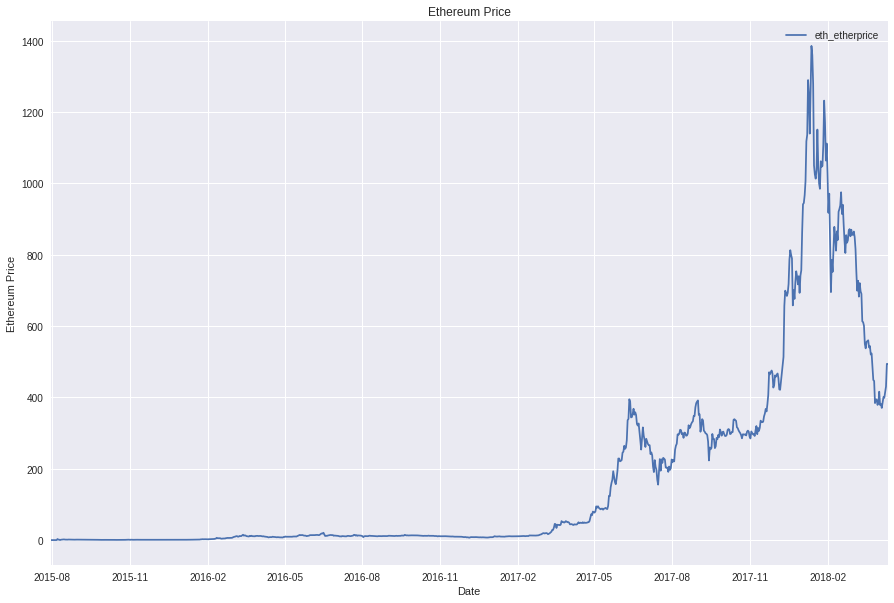

In [66]:
#Plots for different attributes
#Ethereum Price

df = pd.concat([eth_pdf['date'],eth_pdf['eth_etherprice']],axis=1)
ax = df.plot(x="date", y="eth_etherprice", kind='line',title='Ethereum Price',figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Ethereum Price")
plt.show()

In [123]:
eth_preds = eth_pdf.iloc[8:,[1,4,5,7,8,9,11,12,13]]

In [124]:
eth_preds.head(5)

,eth_tx,eth_marketcap,eth_supply,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_blocksize,eth_gasprice,eth_blocktime
8,2050.0,216.839767,72279928.0,1.471,3.730000e+19,5189.0,633.0,6.050000e+11,16.650000
9,2881.0,86.769440,72307872.0,1.586,6.810000e+19,5256.0,668.0,3.230000e+11,16.440001
10,1329.0,86.802055,72335048.0,1.709,1.410000e+19,5123.0,618.0,4.750000e+11,16.860001
11,2037.0,0.000000,72362864.0,1.838,3.120000e+19,5255.0,631.0,4.220000e+11,16.440001
12,4963.0,71.666985,72390888.0,2.036,1.130000e+19,5280.0,692.0,7.783882e+10,16.370001


8     3.00
9     1.20
10    1.20
11    0.00
12    0.99
Name: eth_etherprice, dtype: float64

[1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1

(array([ 471.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  507.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

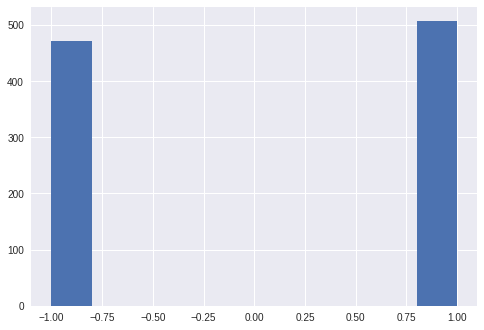

In [125]:
eth_tgt = eth_pdf.iloc[8:,3]
eth_tgt.head(5)

#creating target labels
eth_diff=[]
eth_diff.append(1)
for i in xrange(1,len(eth_tgt)):
    v = eth_tgt.iloc[i] - eth_tgt.iloc[i-1]
    if v < 0:
        eth_diff.append(-1)
    else:
        eth_diff.append(1)

print(eth_diff)
print(len(eth_diff))

plt.hist(eth_diff)
plt.show()

In [126]:
#Consolidating dataset and target
eth_preds = eth_preds.reset_index(drop=True)
eth_target = pd.DataFrame({'eth_target':eth_diff})
eth_target.shape
eth_preds.shape

eth_dat = pd.concat([eth_preds,eth_target],axis=1)
eth_dat.head(5)

(978, 1)

(978, 9)

,eth_tx,eth_marketcap,eth_supply,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_blocksize,eth_gasprice,eth_blocktime,eth_target
0,2050.0,216.839767,72279928.0,1.471,3.730000e+19,5189.0,633.0,6.050000e+11,16.650000,1
1,2881.0,86.769440,72307872.0,1.586,6.810000e+19,5256.0,668.0,3.230000e+11,16.440001,-1
2,1329.0,86.802055,72335048.0,1.709,1.410000e+19,5123.0,618.0,4.750000e+11,16.860001,1
3,2037.0,0.000000,72362864.0,1.838,3.120000e+19,5255.0,631.0,4.220000e+11,16.440001,-1
4,4963.0,71.666985,72390888.0,2.036,1.130000e+19,5280.0,692.0,7.783882e+10,16.370001,1


In [127]:
#Summary

eth_dat.describe()

,eth_tx,eth_marketcap,eth_supply,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_blocksize,eth_gasprice,eth_blocktime,eth_target
count,9.780000e+02,978.000000,9.780000e+02,978.000000,9.780000e+02,978.000000,978.000000,9.780000e+02,978.000000,978.000000
mean,2.040522e+05,16255.554189,8.625866e+07,708.782674,2.340374e+20,5494.016360,6775.725971,3.645941e+10,15.938916,0.036810
std,2.880209e+05,26943.766324,8.088158e+06,1023.612761,4.352158e+20,760.089032,8416.602570,4.993240e+10,3.126918,0.999834
min,1.329000e+03,0.000000,7.227993e+07,1.471000,5.510000e+18,2829.000000,618.000000,1.037198e+10,13.430000,-1.000000
25%,3.290350e+04,690.267380,7.886816e+07,25.803249,2.875000e+19,5056.750000,1382.000000,2.245118e+10,14.140000,-1.000000
50%,4.731450e+04,1029.505737,8.671953e+07,84.302998,4.470000e+19,5889.500000,1678.500000,2.379369e+10,14.460000,1.000000
75%,2.926250e+05,27616.539551,9.388635e+07,1423.416779,3.050000e+20,6035.000000,11810.250000,4.340921e+10,16.840000,1.000000
max,1.349890e+06,134210.781250,9.874162e+07,3333.440918,3.700000e+21,6409.000000,33681.000000,9.400000e+11,30.309999,1.000000


In [128]:
#Importing the required packages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

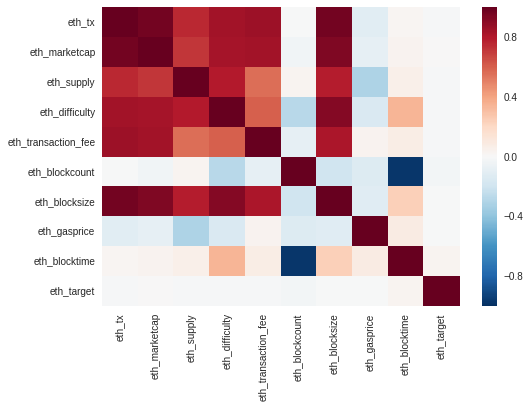

In [129]:
#Checking correlation
corr_mat = eth_dat.corr()

#Heatmap
sns.heatmap(corr_mat)

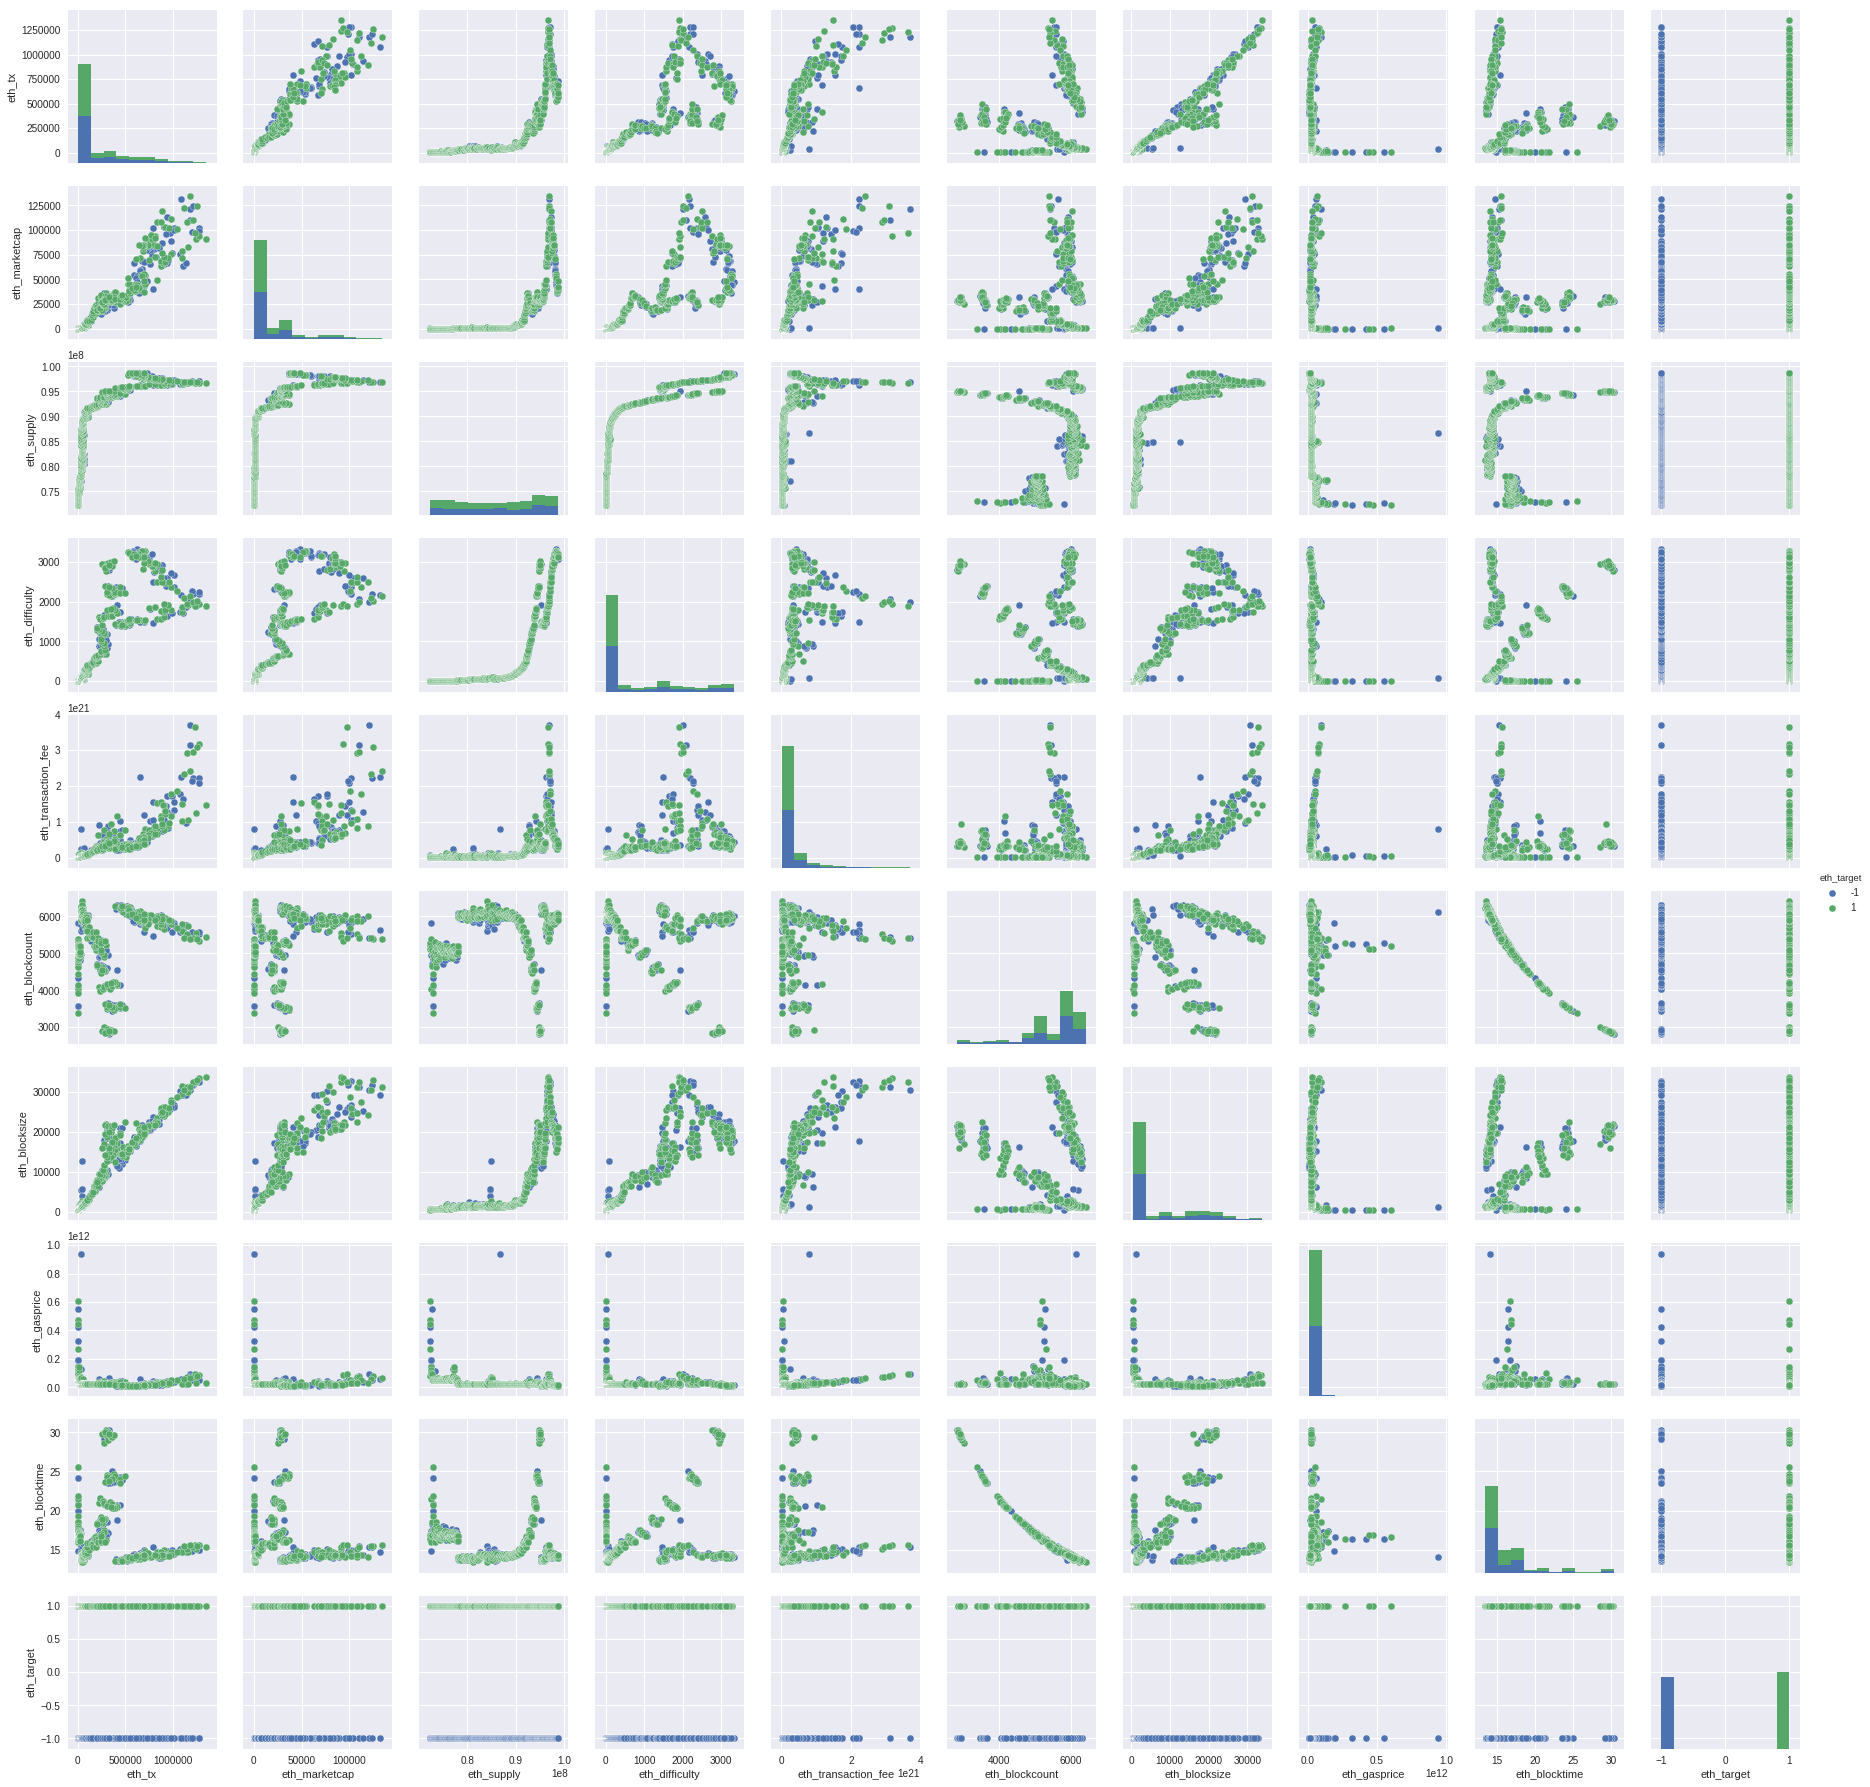

In [143]:
#Pairplots
var_plot = sns.pairplot(data = eth_dat, hue = "eth_target", kind='scatter')
plt.show()

In [130]:
#Dividing into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(
          eth_preds, eth_diff, test_size=0.10, random_state=42)

In [131]:
x_train.head(5)
x_test.head(5)
y_train = pd.DataFrame({'y_train':y_train})
y_test = pd.DataFrame({'y_test':y_test})

y_train.head(5)
y_test.head(5)

,eth_tx,eth_marketcap,eth_supply,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_blocksize,eth_gasprice,eth_blocktime
529,46671.0,892.316895,87999688.0,103.817001,3.940000e+19,6002.0,1642.0,2.274234e+10,14.360000
655,187121.0,15571.768555,91868840.0,448.717010,2.540000e+20,5419.0,6627.0,2.287692e+10,15.830000
678,261617.0,31889.066406,92517888.0,728.250000,2.800000e+20,5305.0,8192.0,2.341181e+10,16.110001
362,49475.0,860.999878,82629544.0,48.632999,3.300000e+19,5984.0,1665.0,2.266750e+10,14.440000
538,46856.0,940.222168,88283768.0,111.653999,3.650000e+19,6081.0,1673.0,2.247899e+10,14.140000


,eth_tx,eth_marketcap,eth_supply,eth_difficulty,eth_transaction_fee,eth_blockcount,eth_blocksize,eth_gasprice,eth_blocktime
199,18190.0,434.283020,77550536.0,13.432000,3.250000e+19,5103.0,1090.0,5.957798e+10,16.680000
543,43649.0,947.201782,88440872.0,112.737000,3.200000e+19,6018.0,1539.0,2.301069e+10,14.290000
174,16765.0,196.070023,76890208.0,10.449000,4.140000e+19,5059.0,1424.0,5.618026e+10,16.959999
928,733084.0,83540.093750,97742008.0,2967.711914,6.260000e+20,5926.0,20793.0,1.883374e+10,14.250000
66,6593.0,46.609200,73982856.0,6.145000,1.070000e+19,5148.0,787.0,5.135990e+10,16.480000


,y_train
0,1
1,1
2,1
3,1
4,1


,y_test
0,1
1,1
2,1
3,1
4,1


In [132]:
#Scaling datasets

from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(x_train)
train_scaler

x_trains = pd.DataFrame(data = train_scaler.transform(x_train))
x_trains.shape
x_trains.describe()
x_trains.head(10)

x_tests = pd.DataFrame(data = train_scaler.transform(x_test))
x_tests.shape
x_tests.describe()
x_tests.head(10)

StandardScaler(copy=True, with_mean=True, with_std=True)

(880, 9)

,0,1,2,3,4,5,6,7,8
count,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02
mean,9.298118e-17,3.835316e-17,-5.604103e-16,-2.788174e-17,2.081668e-17,-4.254804e-16,9.449512e-17,5.538499e-17,-5.270405e-17
std,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00
min,-7.136548e-01,-6.111571e-01,-1.730119e+00,-6.976887e-01,-5.294593e-01,-3.481964e+00,-7.403613e-01,-5.096483e-01,-8.014392e-01
25%,-6.031108e-01,-5.857202e-01,-9.277016e-01,-6.742309e-01,-4.754380e-01,-5.635035e-01,-6.495941e-01,-2.788930e-01,-5.797231e-01
50%,-5.508767e-01,-5.729363e-01,6.534793e-02,-6.156411e-01,-4.355976e-01,5.161960e-01,-6.124974e-01,-2.519638e-01,-4.751997e-01
75%,3.188553e-01,4.175660e-01,9.370899e-01,6.906811e-01,1.714777e-01,7.151224e-01,6.092398e-01,1.283812e-01,2.786354e-01
max,3.764244e+00,4.280649e+00,1.531562e+00,2.546737e+00,8.003293e+00,1.203277e+00,3.184467e+00,1.724684e+01,4.545088e+00


,0,1,2,3,4,5,6,7,8
0,-0.554504,-0.578030,0.207507,-0.598032,-0.451187,0.670626,-0.617823,-0.273366,-0.506874
1,-0.061525,-0.033049,0.684420,-0.262194,0.044450,-0.092362,-0.021284,-0.270796,-0.041269
2,0.199957,0.572736,0.764422,0.009995,0.104500,-0.241557,0.165994,-0.260579,0.047417
3,-0.544662,-0.579192,-0.454420,-0.651766,-0.465969,0.647069,-0.615070,-0.274796,-0.481535
4,-0.553855,-0.576251,0.242523,-0.590401,-0.457885,0.774015,-0.614113,-0.278397,-0.576556
5,2.266951,2.436040,1.403289,2.135820,1.169220,0.470391,1.974757,-0.338008,-0.503706
6,0.612449,0.577976,1.081846,2.252254,0.554869,-3.400823,1.799804,-0.201797,4.326540
7,-0.564567,-0.578388,0.164673,-0.609697,-0.469895,0.679787,-0.623686,-0.268257,-0.519543
8,-0.695782,-0.609379,-1.555615,-0.693617,-0.521930,-0.365886,-0.725642,0.275440,0.155108
9,-0.597776,-0.589605,-0.837342,-0.667938,-0.489988,0.707270,-0.645825,-0.265559,-0.658907


(98, 9)

,0,1,2,3,4,5,6,7,8
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,-0.020917,-0.076480,-0.070791,-0.089426,-0.016518,0.058021,-0.034794,-0.113384,-0.067578
std,1.105201,1.000337,0.966493,0.962670,1.050788,0.944158,1.069672,0.279300,0.896454
min,-0.702272,-0.609999,-1.655007,-0.693459,-0.529182,-3.416528,-0.731865,-0.480515,-0.738092
25%,-0.595069,-0.583583,-0.796350,-0.665262,-0.477805,-0.573319,-0.647769,-0.278844,-0.574972
50%,-0.561998,-0.573008,-0.109620,-0.620457,-0.454652,0.584904,-0.622430,-0.262107,-0.479951
75%,0.121290,0.147124,0.885950,0.561597,0.021354,0.705961,0.413764,-0.011723,0.262798
max,4.019797,4.371468,1.521504,2.498931,5.023923,1.000425,3.216179,0.715401,4.345544


,0,1,2,3,4,5,6,7,8
0,-0.654473,-0.595034,-1.080461,-0.686042,-0.467124,-0.505920,-0.683879,0.430218,0.227957
1,-0.565112,-0.575992,0.261887,-0.589346,-0.468278,0.691565,-0.630148,-0.268241,-0.529045
2,-0.659474,-0.603878,-1.161853,-0.688947,-0.446568,-0.563503,-0.643910,0.365319,0.316644
3,1.854807,2.490300,1.408350,2.190617,0.903617,0.571163,1.673914,-0.348023,-0.541715
4,-0.695178,-0.609427,-1.520215,-0.693138,-0.517473,-0.447027,-0.720138,0.273247,0.164610
5,-0.552318,-0.584598,0.075126,-0.619589,-0.461581,0.772706,-0.594727,-0.275735,-0.576556
6,0.419528,0.606510,0.981856,1.423731,0.092952,-2.585486,0.974104,-0.284628,2.682673
7,-0.554957,-0.574252,0.281287,-0.584063,-0.461811,0.768780,-0.621173,-0.281223,-0.570221
8,-0.380626,-0.437214,0.485891,-0.468366,-0.377973,0.550223,-0.472906,-0.281095,-0.440359
9,-0.680194,-0.607694,-1.214013,-0.690465,-0.483060,-0.732329,-0.683400,0.333727,0.402163


### Random Forest Algorithm

In [133]:
#Random Forest Model -- 2 labels         min sample leaf 25
#param_grid = {
#    'n_estimators': [5, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'criterion': ['gini','entropy'],
#    'min_samples_leaf': [10, 60]
#}
rdforest = RandomForestClassifier(max_features= 'log2' ,n_estimators=13,criterion='entropy',min_samples_leaf=25, 
                                  oob_score=True, n_jobs=-1, random_state=1514)
#rdforestmod = GridSearchCV(rdforest, param_grid, cv=5)
rdforest.fit(x_train, y_train.values.ravel())
rdpreds = rdforest.predict(x_test)
print(rdpreds)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=13, n_jobs=-1, oob_score=True, random_state=1514,
            verbose=0, warm_start=False)

[ 1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1
  1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1
  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1]


[[29 18]
 [19 32]]
0.622448979592
0.622236128494
0.622083333333
0.622094841063


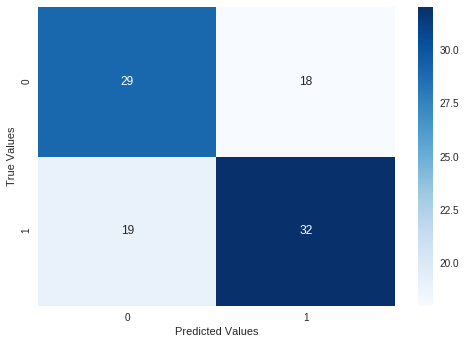

precision: [ 0.60416667  0.64      ]
recall: [ 0.61702128  0.62745098]
fscore: [ 0.61052632  0.63366337]
support: [47 51]


In [134]:
#Evaluation Metrics for Random Forest -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, rdpreds))
print(metrics.accuracy_score(y_test, rdpreds))
print(metrics.recall_score(y_test, rdpreds,average='macro'))
print(metrics.precision_score(y_test, rdpreds,average='macro'))
print(metrics.f1_score(y_test, rdpreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, rdpreds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, rdpreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Logistic Regression Algorithm

In [135]:
#Logistic Regression Model -- 2 labels
logrmodel = LogisticRegression(C=0.01)
logrmodel.fit(x_trains, y_train.values.ravel())
log_preds = logrmodel.predict(x_tests)
print(log_preds)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[ 1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1]


[[ 7 40]
 [ 9 42]]
0.5
0.486232790989
0.474847560976
0.426900584795


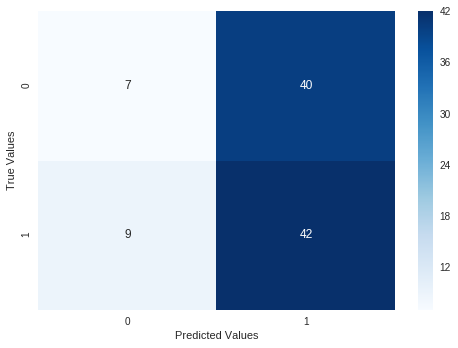

precision: [ 0.4375      0.51219512]
recall: [ 0.14893617  0.82352941]
fscore: [ 0.22222222  0.63157895]
support: [47 51]


In [136]:
#Calculating test metrics to evaluate the model -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, log_preds))
print(metrics.accuracy_score(y_test, log_preds))
print(metrics.recall_score(y_test, log_preds,average='macro'))
print(metrics.precision_score(y_test, log_preds,average='macro'))
print(metrics.f1_score(y_test, log_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, log_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, log_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### K-Nearest Neighbors

In [137]:
param_grid = {
    'n_neighbors': [1 , 100],
 'leaf_size': [10, 10000],
  'algorithm':['auto','ball_tree','kd_tree','brute'],
    'metric':['euclidean','manhattan','chebyshev']  
}
knn_mod = KNeighborsClassifier(n_neighbors = 16, algorithm = 'auto', leaf_size=1000, metric='manhattan',n_jobs=-1) 
knn_mod1 = GridSearchCV(knn_mod, param_grid)
knn_mod1.fit(x_trains, y_train.values.ravel())
knn_preds = knn_mod1.predict(x_tests)
print(knn_preds)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=1000, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 100], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'leaf_size': [10, 10000], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[-1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1
 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1
  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1]


[[30 17]
 [24 27]]
0.581632653061
0.583854818523
0.584595959596
0.581240229286


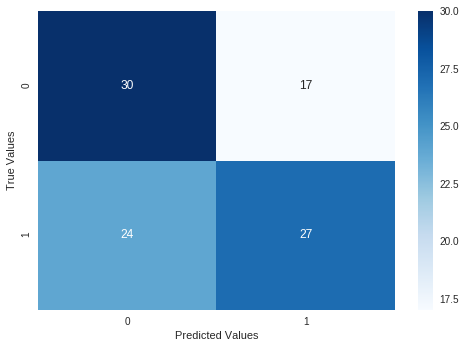

precision: [ 0.55555556  0.61363636]
recall: [ 0.63829787  0.52941176]
fscore: [ 0.59405941  0.56842105]
support: [47 51]


In [138]:
#Evaluation Metrics for KNN k=12 -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, knn_preds))
print(metrics.accuracy_score(y_test, knn_preds))
print(metrics.recall_score(y_test, knn_preds,average='macro'))
print(metrics.precision_score(y_test, knn_preds,average='macro'))
print(metrics.f1_score(y_test, knn_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, knn_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, knn_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Support Vector Machine Algorithm

In [139]:
#To be implemented

parameters = {'kernel':('linear', 'poly'), 'C':[1, 10]}
svm_mod = SVC(kernel = 'linear', C=1)
clf = svm_mod
clf = GridSearchCV(svm_mod, parameters)
clf.fit(x_trains, y_train.values.ravel())
svm_preds = clf.predict(x_tests)
print(svm_preds)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[ 1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1]


[[ 4 43]
 [ 6 45]]
0.5
0.483729662078
0.455681818182
0.393916445791


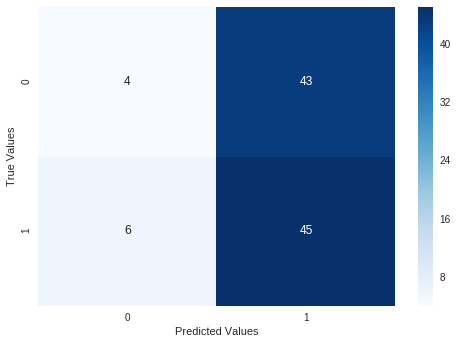

precision: [ 0.4         0.51136364]
recall: [ 0.08510638  0.88235294]
fscore: [ 0.14035088  0.64748201]
support: [47 51]


In [140]:
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, svm_preds))
print(metrics.accuracy_score(y_test, svm_preds))
print(metrics.recall_score(y_test, svm_preds,average='macro'))
print(metrics.precision_score(y_test, svm_preds,average='macro'))
print(metrics.f1_score(y_test, svm_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, svm_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, svm_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Neural Networks

In [141]:
import numpy as np

parameters = {'activation':['tanh', 'relu', 'logistic'], 'alpha':np.logspace(-5, 3, 5), 'hidden_layer_sizes':[(10,),(50,),(100,)],'solver':['sgd','adam'],'learning_rate':['constant','invscaling'],'learning_rate_init':[0.001,1]}
mlpmod = MLPClassifier(activation='tanh',solver='sgd',random_state=1)
clfmlp = GridSearchCV(mlpmod, parameters, cv=2)
clfmlp.fit(x_trains, y_train.values.ravel())
print(clfmlp.best_params_)
mlp_preds = clfmlp.predict(x_tests)
print(mlp_preds)

GridSearchCV(cv=2, error_score='raise',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['sgd', 'adam'], 'activation': ['tanh', 'relu', 'logistic'], 'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': array([  1.00000e-05,   1.00000e-03,   1.00000e-01,   1.00000e+01,
         1.00000e+03]), 'learning_rate': ['constant', 'invscaling'], 'learning_rate_init': [0.001, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'solver': 'adam', 'activation': 'logistic', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'learning_rate': 'constant', 'learning_rate_init': 1}
[ 1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1
  1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1
 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1]


[[18 29]
 [25 26]]
0.448979591837
0.446391322486
0.445665961945
0.445283018868


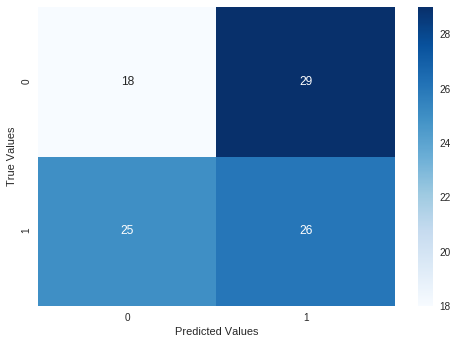

precision: [ 0.41860465  0.47272727]
recall: [ 0.38297872  0.50980392]
fscore: [ 0.4         0.49056604]
support: [47 51]


In [142]:
#Evaluation Metrics for MLP -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, mlp_preds))
print(metrics.accuracy_score(y_test, mlp_preds))
print(metrics.recall_score(y_test, mlp_preds,average='macro'))
print(metrics.precision_score(y_test, mlp_preds,average='macro'))
print(metrics.f1_score(y_test, mlp_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, mlp_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, mlp_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))